In [95]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn import model_selection
from sklearn import linear_model
from sklearn.model_selection import KFold
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import LinearRegression
import numpy as np 
from sklearn.metrics import mean_squared_error, mean_absolute_error

# 1 

A partir del fichero "US_Crime_Rates_1960_2014", se pide:

1. Tratar el dataset como una serie temporal a partir de la columna Year. Siempre el eje X será el nuevo índice Year.
2. Dibujar todas las columnas numéricas.
3. Como se puede ver en el punto 2, la columna "Population" tiene una magnitud diferente a la de las demás columnas: Dibuja la misma gráfica que antes pero con dos resoluciones diferentes para que se puedan observar con mejor detalle todas las columnas. 
4. A partir de ahora y para el resto del ejercicio, borra las columnas "Population" y "Total" ¿Qué columnas tienen mejor correlación? 
5. A partir de las cinco columnas que tengan mejor correlación con la columna "Murder", entrena un modelo de regresión no lineal a partir de polinomio de grado 6. Este modelo ha de entrenarse siguiendo el esquema recomendado de validación cruzada y almacenando los errores de entrenamiento y validación en cada iteración del entrenamiento.
6. Representa la evolución de los errores de validación y entrenamiento en una gráfica. ¿Ha habido sobreaprendizaje?. Utiliza n_iteraciones=23 y n_repeats=7.

<AxesSubplot:xlabel='Year'>

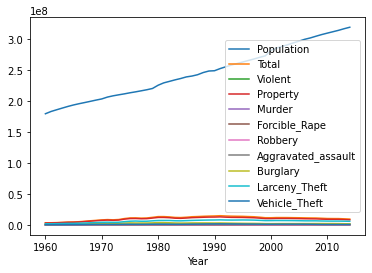

In [96]:
import pandas as pd
df = pd.read_csv("../data/US_Crime_Rates_1960_2014.csv")

df.set_index("Year", inplace=True)
df.plot()

In [97]:
df.head()

,Population,Total,Violent,Property,Murder,Forcible_Rape,Robbery,Aggravated_assault,Burglary,Larceny_Theft,Vehicle_Theft
Year,,,,,,,,,,,
1960,179323175,3384200,288460,3095700,9110,17190,107840,154320,912100,1855400,328200
1961,182992000,3488000,289390,3198600,8740,17220,106670,156760,949600,1913000,336000
1962,185771000,3752200,301510,3450700,8530,17550,110860,164570,994300,2089600,366800
1963,188483000,4109500,316970,3792500,8640,17650,116470,174210,1086400,2297800,408300
1964,191141000,4564600,364220,4200400,9360,21420,130390,203050,1213200,2514400,472800


In [98]:
# 2. Dibujar todas las columnas numéricas.

In [99]:
df.dtypes

Population            int64
Total                 int64
Violent               int64
Property              int64
Murder                int64
Forcible_Rape         int64
Robbery               int64
Aggravated_assault    int64
Burglary              int64
Larceny_Theft         int64
Vehicle_Theft         int64
dtype: object

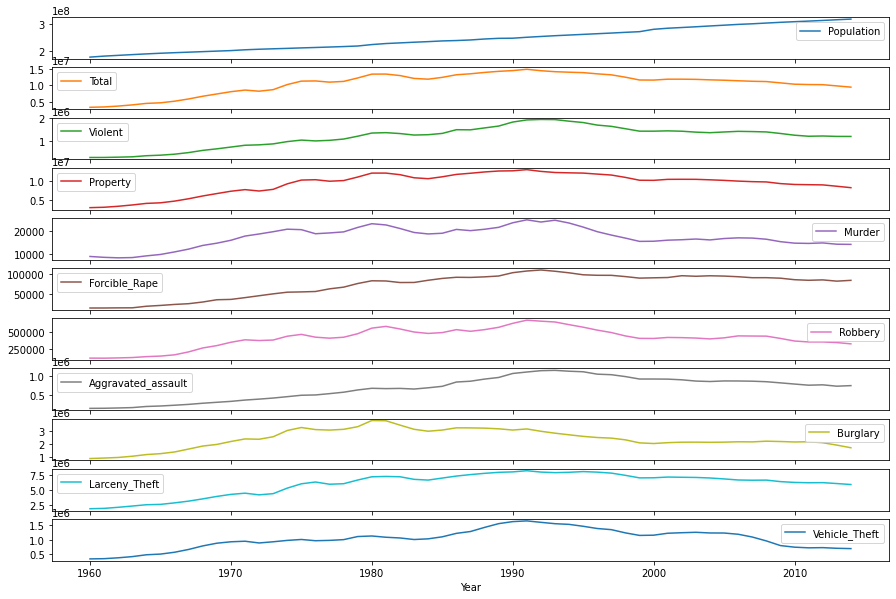

In [100]:
df.plot(subplots=True, figsize=(15,10))
plt.show()

#twinx

In [101]:
# 3. Como se puede ver en el punto 2, la columna "Population" tiene una magnitud diferente a la de las demás columnas: Dibuja la misma gráfica que antes pero con dos resoluciones diferentes para que se puedan observar con mejor detalle todas las columnas.

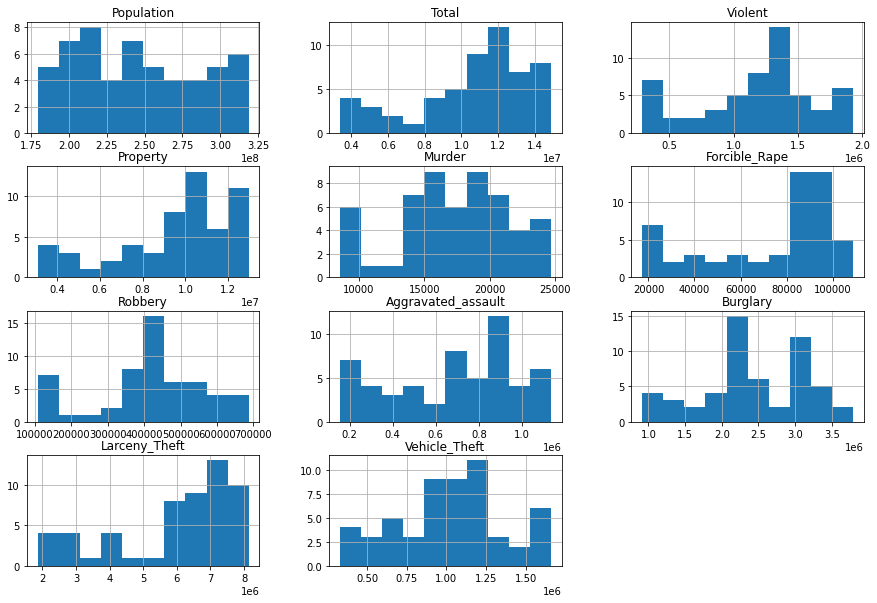

In [102]:
df.hist(figsize=(15,10))

plt.show()

In [103]:
# 4. A partir de ahora y para el resto del ejercicio, borra las columnas "Population" y "Total" ¿Qué columnas tienen mejor correlación?

In [104]:
df.drop(["Population", "Total"], axis=1, inplace=True)

In [105]:
correlation = df.corr()

sort_correlation = correlation.unstack().sort_values(ascending=False)
sort_correlation[sort_correlation < 1]

# Las columnas con mejor correlación son: 'violent' y 'aggravated_assault'


Violent             Aggravated_assault    0.981071
Aggravated_assault  Violent               0.981071
Property            Larceny_Theft         0.980528
Larceny_Theft       Property              0.980528
Violent             Larceny_Theft         0.974791
                                            ...   
                    Burglary              0.646607
Burglary            Forcible_Rape         0.588529
Forcible_Rape       Burglary              0.588529
Aggravated_assault  Burglary              0.498449
Burglary            Aggravated_assault    0.498449
Length: 72, dtype: float64

In [106]:
# 5. A partir de las cinco columnas que tengan mejor correlación con la columna "Murder", entrena un modelo de regresión no lineal a partir de polinomio de grado 6. Este modelo ha de entrenarse siguiendo el esquema recomendado de validación cruzada y almacenando los errores de entrenamiento y validación en cada iteración del entrenamiento.

In [107]:
correlation["Murder"].sort_values(ascending=False)[1:6]

Robbery          0.960156
Burglary         0.920207
Property         0.895641
Vehicle_Theft    0.856600
Larceny_Theft    0.806279
Name: Murder, dtype: float64

In [108]:
X = df[["Robbery", "Burglary", "Property", "Vehicle_Theft", "Larceny_Theft"]]
y = df["Murder"]

In [109]:
X = X.to_numpy()
y = y.to_numpy()

In [59]:
import numpy as np
#y = np.array(y).reshape(-1,1)

In [111]:
X.shape

(55, 5)

In [112]:
y.shape

(55,)

In [39]:
# Representa la evolución de los errores de validación y entrenamiento en una gráfica. ¿Ha habido sobreaprendizaje?. Utiliza n_iteraciones=23 y n_repeats=7.

In [136]:
import warnings
warnings.filterwarnings("ignore")

k_fold = RepeatedKFold(n_splits= 23, n_repeats=7, random_state=42)

val_score = []
train_score = []
train_MAE = []
val_MAE = []
train_RMSE = []
val_RMSE = []

polinominal_model = PolynomialFeatures(degree=6) 
X_poly = polinominal_model.fit_transform(X, y)
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)

lin_reg_model = LinearRegression()

for i, (train, val) in enumerate(k_fold.split(X_train)):

    lin_reg_model.fit(X_train[train], y_train[train])
    score_val = lin_reg_model.score(X_train[val], y_train[val])

    predictions_train = lin_reg_model.predict(X_train[train])
    predictions_val = lin_reg_model.predict(X_train[val])

    train_MAE.append(mean_absolute_error(y_train[train], predictions_train))
    train_RMSE.append(np.sqrt(mean_squared_error(y_train[train], predictions_train)))
    val_MAE.append(mean_absolute_error(y_train[val], predictions_val))
    val_RMSE.append(np.sqrt(mean_squared_error(y_train[val], predictions_val)))

    val_score.append(score_val)
    score_train = lin_reg_model.score(X_train[train], y_train[train])
    train_score.append(score_train)

dictionary = {"Validation Score": val_score, "Train Score": train_score, "MAE Train": train_MAE, "MAE Validation": val_MAE, "RMSE Train": train_RMSE, "RMSE Validation": val_RMSE} 

scores = pd.DataFrame(dictionary)
scores

,Validation Score,Train Score,MAE Train,MAE Validation,RMSE Train,RMSE Validation
0,-5.766209e+03,1.0,0.000236,2.672528e+05,0.000380,2.830364e+05
1,-1.979152e+03,1.0,0.000344,8.716063e+04,0.000503,1.225722e+05
2,-7.638518e+07,1.0,0.000442,1.028037e+06,0.000501,1.310979e+06
3,-1.868403e+06,1.0,0.000453,7.988542e+05,0.000536,9.499926e+05
4,-6.592656e+00,1.0,0.000299,8.518812e+03,0.000474,8.674243e+03
...,...,...,...,...,...,...
156,-5.270992e+03,1.0,0.000540,1.632371e+05,0.000678,1.837358e+05
157,-3.115893e+03,1.0,0.000358,1.209413e+05,0.000529,1.340179e+05
158,-3.539830e+03,1.0,0.050352,3.345889e+05,0.064295,4.727662e+05
159,NaN,1.0,0.000459,1.038949e+03,0.000515,1.038949e+03


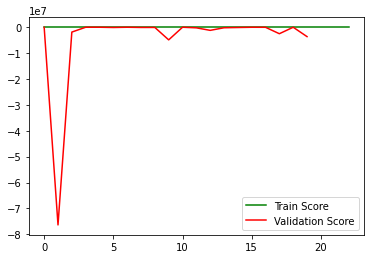

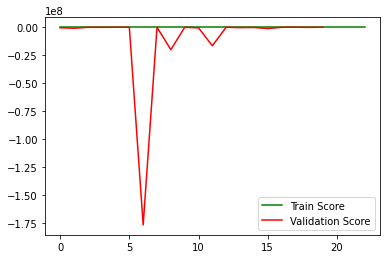

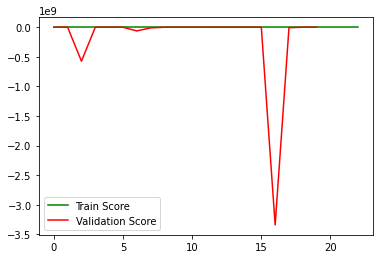

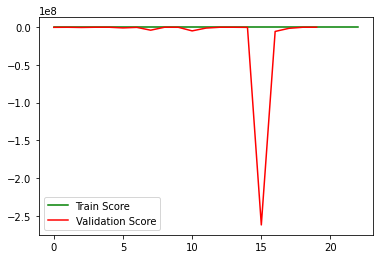

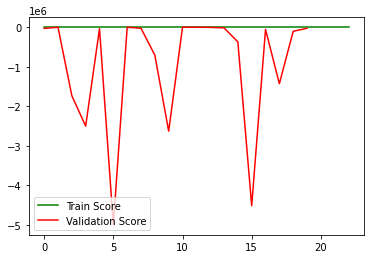

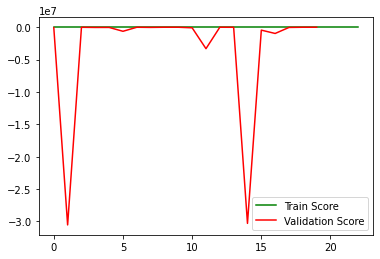

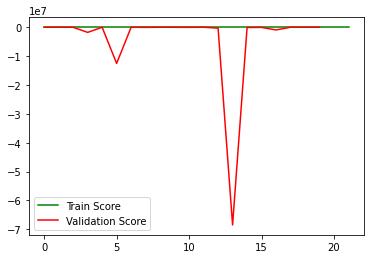

In [196]:
for i in range(1, 162, 23):
    fig, ax = plt.subplots()
    ax.plot(train_score[i:i+23], color="green", label="Train Score")
    ax.plot(val_score[i:i+23], color="red", label= "Validation Score")
    ax.legend(loc="best")

    plt.show()